In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
train=pd.read_csv("titanic_classic/train.csv")
train_df=train.copy()
test=pd.read_csv("titanic_classic/test.csv")
test_df=test.copy()

# Data Dictionary
survival = Survival = 0 = No, 1 = Yes

pclass = Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

sex	= Sex	

Age	Age in years 

sibsp = # of siblings / spouses aboard the Titanic

parch = # of parents / children aboard the Titanic

ticket = Ticket number

fare = Passenger fare

cabin = Cabin number

embarked = Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton


In [2]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
train_df.isnull().sum()/len(train_df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [6]:
#We found null values in all columns
def null_value(df1, df2):
    null_values = pd.concat([df1.isna().sum().rename("train")/len(df1), 
                             df2.isna().sum().rename("test")/len(df2)], 
                            axis=0).rename("null count").reset_index().rename(columns={"index":"column"})
    null_values['data'] = ['train']*len(df1.columns) + ['test']*len(df2.columns)
    f, ax = plt.subplots(figsize=(5, 5))
    sns.barplot(data = null_values, y="column", x="null count", hue="data", orient="h")

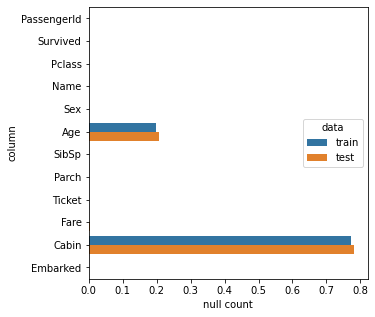

In [7]:
null_value(train_df, test_df)


In [8]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [9]:
#We fill null-values with SimpleImputer

from sklearn.impute import SimpleImputer

cat_features = list(train.select_dtypes(include=["category", "object"]).columns)#we selected Category or object columns

num_features = list(test.select_dtypes(include=["number"]).columns)#we selected Number columns
# Categorical
imputer = SimpleImputer(strategy="most_frequent")

train[cat_features] = imputer.fit_transform(train[cat_features])#category and object null values are filled with the most frequent method

test[cat_features] = imputer.transform(test[cat_features])#category and object nullempty values are filled with the most frequent method

# Numerical

# imputer = SimpleImputer(strategy="median")
imputer = SimpleImputer(strategy="median")  # median is more robust to outliers

train[num_features] = imputer.fit_transform(train[num_features])#number null values are filled with the median method

test[num_features] = imputer.transform(test[num_features])

In [10]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [11]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

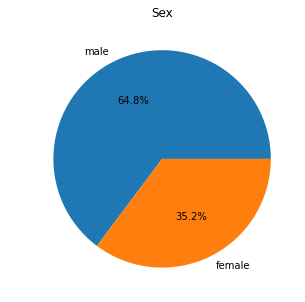

In [12]:
#We visualized the column='Sex'

plt.figure(figsize = (5,5))

plt.subplot(1,1,1)

(train['Sex'].value_counts().plot(kind = 'pie', autopct='%.1f%%'))

plt.ylabel(" ", fontsize = 15)

plt.title("Sex")

print("")


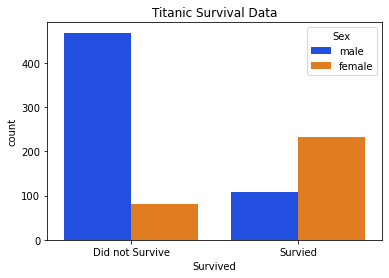

In [13]:
#We visulated the together columns='Sex',Survival
sns.set_palette("bright")
#We adjustment table palette

sns.countplot(data=train, x = 'Survived', hue='Sex').set(xticklabels = ['Did not Survive', 'Survied'], 
                                                         title = 'Titanic Survival Data')
plt.show()

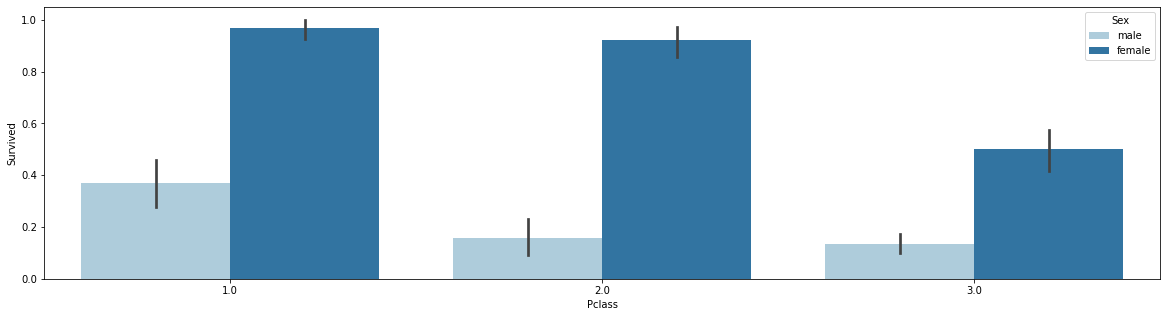

In [14]:
sns.set_palette("Paired")
plt.figure(figsize=(20,5))
sns.barplot(x='Pclass',y='Survived', hue='Sex',data=train , estimator=np.mean)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x360 with 0 Axes>

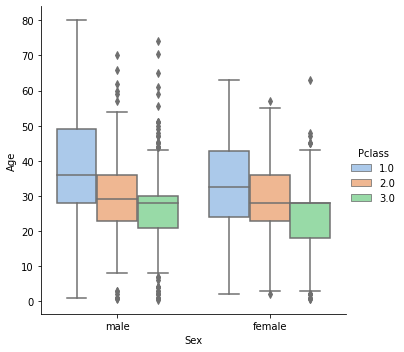

In [15]:
plt.figure(figsize = (15,5))
sns.set_palette("pastel")

sns.factorplot(x = "Sex", y = "Age", hue = "Pclass",data = train, kind = "box")
plt.show()


In [16]:
from sklearn.preprocessing import LabelEncoder

# Creating instance for label encoder
le = LabelEncoder()
# Transform Sex in train_data to numerical data
numerical_Sex = le.fit_transform(train['Sex'])
train = train.drop(['Sex'], axis=1)
train['Sex'] = numerical_Sex

numerical_Embarked = le.fit_transform(train['Embarked'])
train = train.drop(['Embarked'], axis=1)
train['Embarked'] = numerical_Embarked
train


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex,Embarked
0,1.0,0,3.0,"Braund, Mr. Owen Harris",22.0,1.0,0.0,A/5 21171,7.2500,B96 B98,1,2
1,2.0,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1.0,0.0,PC 17599,71.2833,C85,0,0
2,3.0,1,3.0,"Heikkinen, Miss. Laina",26.0,0.0,0.0,STON/O2. 3101282,7.9250,B96 B98,0,2
3,4.0,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1.0,0.0,113803,53.1000,C123,0,2
4,5.0,0,3.0,"Allen, Mr. William Henry",35.0,0.0,0.0,373450,8.0500,B96 B98,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0,2.0,"Montvila, Rev. Juozas",27.0,0.0,0.0,211536,13.0000,B96 B98,1,2
887,888.0,1,1.0,"Graham, Miss. Margaret Edith",19.0,0.0,0.0,112053,30.0000,B42,0,2
888,889.0,0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1.0,2.0,W./C. 6607,23.4500,B96 B98,0,2
889,890.0,1,1.0,"Behr, Mr. Karl Howell",26.0,0.0,0.0,111369,30.0000,C148,1,0


In [17]:
numerical_Sex = le.fit_transform(test['Sex'])
test = test.drop(['Sex'], axis=1)
test['Sex'] = numerical_Sex

numerical_Embarked = le.fit_transform(test['Embarked'])
test = test.drop(['Embarked'], axis=1)
test['Embarked'] = numerical_Embarked
train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex,Embarked
0,1.0,0,3.0,"Braund, Mr. Owen Harris",22.0,1.0,0.0,A/5 21171,7.2500,B96 B98,1,2
1,2.0,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1.0,0.0,PC 17599,71.2833,C85,0,0
2,3.0,1,3.0,"Heikkinen, Miss. Laina",26.0,0.0,0.0,STON/O2. 3101282,7.9250,B96 B98,0,2
3,4.0,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1.0,0.0,113803,53.1000,C123,0,2
4,5.0,0,3.0,"Allen, Mr. William Henry",35.0,0.0,0.0,373450,8.0500,B96 B98,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0,2.0,"Montvila, Rev. Juozas",27.0,0.0,0.0,211536,13.0000,B96 B98,1,2
887,888.0,1,1.0,"Graham, Miss. Margaret Edith",19.0,0.0,0.0,112053,30.0000,B42,0,2
888,889.0,0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1.0,2.0,W./C. 6607,23.4500,B96 B98,0,2
889,890.0,1,1.0,"Behr, Mr. Karl Howell",26.0,0.0,0.0,111369,30.0000,C148,1,0


In [18]:
#We examine corr table
train.corr().style.background_gradient(cmap='coolwarm')


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658,0.042939,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.543351,-0.167675
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.131900,0.162098
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.081163,-0.018754
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.114631,0.068230
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.245489,0.039798
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182333,-0.224719
Sex,0.042939,-0.543351,0.131900,0.081163,-0.114631,-0.245489,-0.182333,1.000000,0.108262
Embarked,0.013128,-0.167675,0.162098,-0.018754,0.068230,0.039798,-0.224719,0.108262,1.000000


<AxesSubplot:>

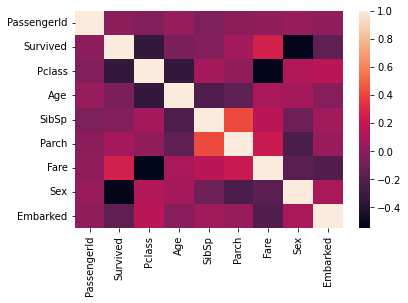

In [19]:
sns.heatmap(train.corr())

In [20]:

X = train.drop(['Survived'],axis=1)

y=train["Survived"]

X.corr().style.background_gradient(cmap='coolwarm')


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
PassengerId,1.000000,-0.035144,0.034212,-0.057527,-0.001652,0.012658,0.042939,0.013128
Pclass,-0.035144,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.131900,0.162098
Age,0.034212,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.081163,-0.018754
SibSp,-0.057527,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.114631,0.068230
Parch,-0.001652,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.245489,0.039798
Fare,0.012658,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182333,-0.224719
Sex,0.042939,0.131900,0.081163,-0.114631,-0.245489,-0.182333,1.000000,0.108262
Embarked,0.013128,0.162098,-0.018754,0.068230,0.039798,-0.224719,0.108262,1.000000


In [21]:
#we install the necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


#We determine the train test datasets
y_train = train['Survived']
X_train = train[['Pclass','Sex','Age','SibSp','Parch','Fare']]
X_test = test[['Pclass','Sex','Age','SibSp','Parch','Fare']]
    
# we standardize the data using the StandartScaler method

scaler = MinMaxScaler()
scaler.fit(X_train)

#we convert training and validation datasets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_test

array([[1.        , 1.        , 0.4282483 , 0.        , 0.        ,
        0.01528158],
       [1.        , 0.        , 0.58532295, 0.125     , 0.        ,
        0.01366309],
       [0.5       , 1.        , 0.77381252, 0.        , 0.        ,
        0.01890874],
       ...,
       [1.        , 1.        , 0.47851219, 0.        , 0.        ,
        0.01415106],
       [1.        , 1.        , 0.34656949, 0.        , 0.        ,
        0.01571255],
       [1.        , 1.        , 0.34656949, 0.125     , 0.16666667,
        0.0436405 ]])

In [23]:
from sklearn.model_selection import train_test_split
train_X, verif_X, train_y, verif_y = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [24]:
#We find the best params for Kneighbors



from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix,classification_report

grid_paramets={'n_neighbors':np.arange(1,30)}

Kneigh=KNeighborsClassifier()

neigh_cv=GridSearchCV(Kneigh,grid_paramets,cv=5)

neigh_cv.fit(X_train,y_train)

neigh_cv.best_params_


{'n_neighbors': 4}

In [40]:
#Establishing a KNeighbors models

neigh=KNeighborsClassifier(n_neighbors=4)

neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto',leaf_size=30,
                     metric='minkowski',metric_params=None,n_jobs=1,n_neighbors=4,p=2,weights='uniform')

y_Kpre=neigh.predict(verif_X)
print(classification_report(verif_y, y_Kpre))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89       105
           1       0.89      0.76      0.82        74

    accuracy                           0.86       179
   macro avg       0.87      0.85      0.85       179
weighted avg       0.86      0.86      0.86       179



In [26]:
#Establishing a LogisticRegression models

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve,roc_auc_score

from sklearn.metrics import confusion_matrix,classification_report

log_model=LogisticRegression()

log_model.fit(X_train,y_train)

y_logpre=log_model.predict(verif_X)

print(classification_report(verif_y, y_logpre))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [27]:
#Establishing a DecisionTreeClassifier models

from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

tree_clf=DecisionTreeClassifier(max_depth=2)

tree_clf.fit(X_train,y_train)

y_treepreds=tree_clf.predict(verif_X)

print(classification_report(verif_y, y_treepreds))

              precision    recall  f1-score   support

           0       0.73      0.95      0.83       105
           1       0.88      0.50      0.64        74

    accuracy                           0.77       179
   macro avg       0.81      0.73      0.73       179
weighted avg       0.79      0.77      0.75       179



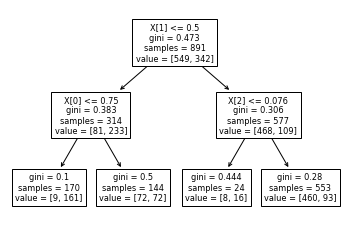

In [28]:
tree.plot_tree(tree_clf);

# Selected KNeighbors  because it gave the best values

In [29]:
test_Kpre=pd.DataFrame(neigh.predict(X_test))
test_Kpre

,0
0,0
1,0
2,0
3,1
4,0
...,...
413,0
414,1
415,0
416,0


In [30]:
#we combined 2 datasets to see the predictions

dfc=pd.merge(test_df,test_Kpre,how="right",left_index=True,right_index=True)

In [31]:
#Change column names
dfc=dfc.rename(columns={0:"Survived"})

# Finish


In [32]:
dfc

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0
